Aprendendo Julia e prevendo dados para o Corona Vírus:
=====

1. Site útil para o aprendizado, plataforma online de Julia: <a href=https://www.cognitiveclass.ai>Cognitive Class</a>

2. Poderosos gráficos que podem ser feitos com  Julia: <a href="http://docs.juliaplots.org/latest/">JuliaPlots </a>

# Modelo a ser usado:


O SIR é um modelo que mede o comportamento de doenças contagiosas. Então SIR, mede a transmissão de uma doença de humano para humano. As variáveis S,I e R representa o número de pessoas em determinado de tempo t em particular.
Cada grupo do modelo são definidos por S, I e R, estes são variaveis dependentes. Já t é como medimos tempo, em dias, e é uma variável independente.

Número de suspeitos : $$S = S(t)$$
Número de infectados: $$I = I(t)$$
Número de recuperados: $$R = R(t)$$

Abaixo temos a fração total da população em cada uma das 3 categorias citadas acima. Considere N o número total da população:


A fração de suspeitos na população: $$s(t) = S(t)/N,$$
A fração de infectados na população: $$i(t) = I(t)/N,$$
A fração de recuperados na população: $$r(t) = R(t)/N,$$

### Fontes bases:
<a href="https://www.maa.org/press/periodicals/loci/joma/the-sir-model-for-spread-of-disease-the-differential-equation-model">Mathematical Association of America</a> e
<a href=https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology>Wikipedia</a>.

Leitura dos dados:
=====

In [153]:
using Plots
gr()
using DelimitedFiles
using Dates
using CSV 

coronaData  = DelimitedFiles.readdlm("arquivo_geral.csv", ',')

dataCasos = coronaData[2:end,3]    
acumuloCasos = coronaData[2:end, 5]   

fvars = Dict()
for index in 1: length(dataCasos)
   dataCasos[index] = Date(dataCasos[index])
   if !haskey(fvars, dataCasos[index]) 
       fvars[dataCasos[index]] = acumuloCasos[index]
   else
       fvars[dataCasos[index]] =  fvars[dataCasos[index]] + acumuloCasos[index]  
    end
    
end

fvars = sort(collect(fvars), by=x->x[1])

dataCasos =  [v[1] for v in fvars] 
acumuloCasos = [v[2] for v in fvars] 


90-element Array{Int64,1}:
     0
     0
     0
     0
     0
     0
     0
     0
     0
     0
     0
     0
     0
     ⋮
 33682
 36599
 38654
 40581
 43079
 45757
 49492
 52995
 58509
 61888
 66501
 71886

Modelo SIR:
====


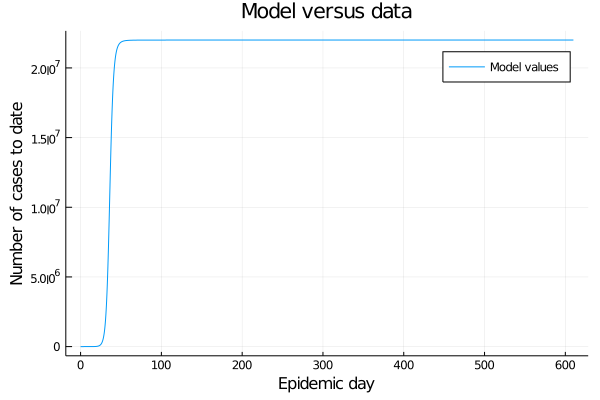

GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to un

In [145]:
function updateSIR(popnvector)
    susceptibles = popnvector[1];
    infecteds = popnvector[2]; 
    removeds = popnvector[3];
    newS = susceptibles - lambda*susceptibles*infecteds*dt
    newI = infecteds + lambda*susceptibles*infecteds*dt - gam*infecteds*dt  
    newR = removeds + gam*infecteds*dt
    return [newS newI newR] 
end

# set parameter values
lambda = 2.3*10^-8.   # infection rate parameter (assumes rates are per day)
gam = 0.05      # recovery rate parameter  (ditto)
dt = 0.1         # length of time step in days
tfinal = 610.;    # respecting community values: lowercase only in the names 

# set initial values (originally s0, lambda, gam, i0 = 22.*10^6., 2.3*10^-8., 0.05, 40. )
s0 = 22.0*10^6.     # initial susceptibles, note that we use the  type Float64 from the start
i0 = 2.          # initial infecteds; set this to 1. to  mimic an epidemic with an index case
r0 = 0.          # not always the case, of course

# initialise 
nsteps = round(Int64, tfinal/dt)    # note the use of round() with type Int64 to ensure that nsteps is an integer
resultvals = Array{Float64}(undef, nsteps+1, 3)  #initialise array of type Float64 to hold results
timevec = Array{Float64}(undef, nsteps+1)        # ... ditto for time values
resultvals[1,:] = [s0, i0, r0]  # ... and assign them to the first row
timevec[1] = 0.                 # also Float64, of course.

# the main loop over time steps
for step  = 1:nsteps
    resultvals[step+1, :] = updateSIR(resultvals[step, :])  # NB! pay careful attention to the rows being used
    timevec[step+1] = timevec[step] + dt
end

# make the plot
ivals = resultvals[:, 2]
rvals = resultvals[:, 3]
cvals = ivals + rvals     # assemble the model values for the case

plot(timevec, cvals,       # first the model's output s plotted as a line
label = "Model values",
xlabel = "Epidemic day",
ylabel = "Number of cases to date",
title = "Model versus data")

#plot!(dataCasos, acumuloCasos,
#legend = :right,
#line = :scatter,
#label = "Reported number of cases")

Gráficos:
====

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


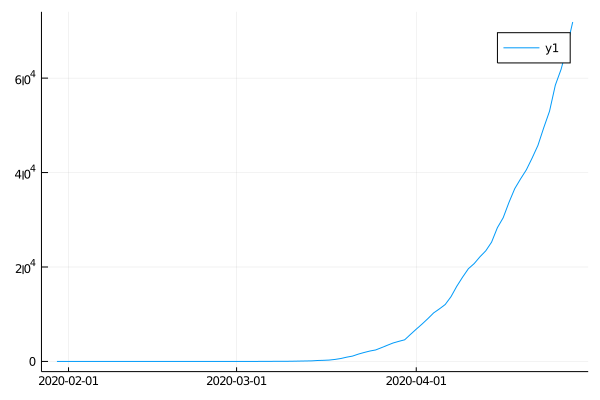

GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error


In [139]:
import Pkg
Pkg.add("StatsPlots")
using StatsPlots: @df, StatsPlots
data = DataFrame(AcumuloCasos = acumuloCasos, DataCasos=dataCasos)

plot(dataCasos,acumuloCasos)

In [147]:
describe(data)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,AcumuloCasos,10127.9,0,160.5,71886,,,Int64
2,DataCasos,,2020-01-30,,2020-04-28,90,,Date


Salvando CSV:
====

In [152]:
CSV.write("ProjectData_1_point_0.csv", data);